# Introduzione

Una società automobilistica giapponese aspira ad entrare nel mercato statunitense stabilendo lì la propria fabbrica di produzione e producendo auto a livello locale per dare concorrenza alle controparti statunitensi ed europee.

Una società di consulenza automobilistica è stata incaricata per comprendere i fattori da cui dipende il prezzo delle auto. Nello specifico, si vogliono comprendere i fattori che influenzano il prezzo delle auto nel mercato americano, poiché questi possono essere molto diversi dal mercato giapponese. 
L'azienda, in particolare, vuole conoscere:

    - Quali sono le variabili significative nella previsione del prezzo di un'auto
    - In che misura queste variabili influenzano il prezzo di un'auto

Sulla base di varie indagini di mercato, la società di consulenza ha raccolto un ampio set di dati di diversi tipi di auto in tutto il mercato americano.

# Obiettivo aziendale

È necessario modellare il prezzo delle auto con le variabili indipendenti disponibili. Esse saranno utilizzate dal management per capire quanto variano esattamente i prezzi con le variabili indipendenti. Di conseguenza si potrà modellare il design delle auto, la strategia aziendale, ecc... per soddisfare determinati livelli di prezzo. Inoltre, il modello di predizione sarà un buon modo per comprendere le dinamiche di prezzo di un nuovo mercato.

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Leggere e comprendere il dataset

Iniziamo con i seguenti passi:

1. Importare il dataset usando la libreria di pandas
2. Comprendere la struttura del dataset

In [2]:
cars = pd.read_csv('data/CarPrice.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.shape

(205, 26)

In [4]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Step 2 : Pulizia e preparazione del dataset
- Separiamo il nome della macchina dal nome dell'azienda ed eliminiamo la feature del nome della macchina dal dataset, poichè inutile.

In [6]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


- Vediamo i nomi di tutte le aziende presenti nel dataset.

In [7]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

## Rinominazione dei nomi delle aziende
- Sembrano essersi alcuni errori di spelling nella colonna CompanyName.

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [8]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [9]:
#Checking for duplicates
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


 - Vediamo tutte le feature del dataset

In [10]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Step 3: Visualizzazione delle feature


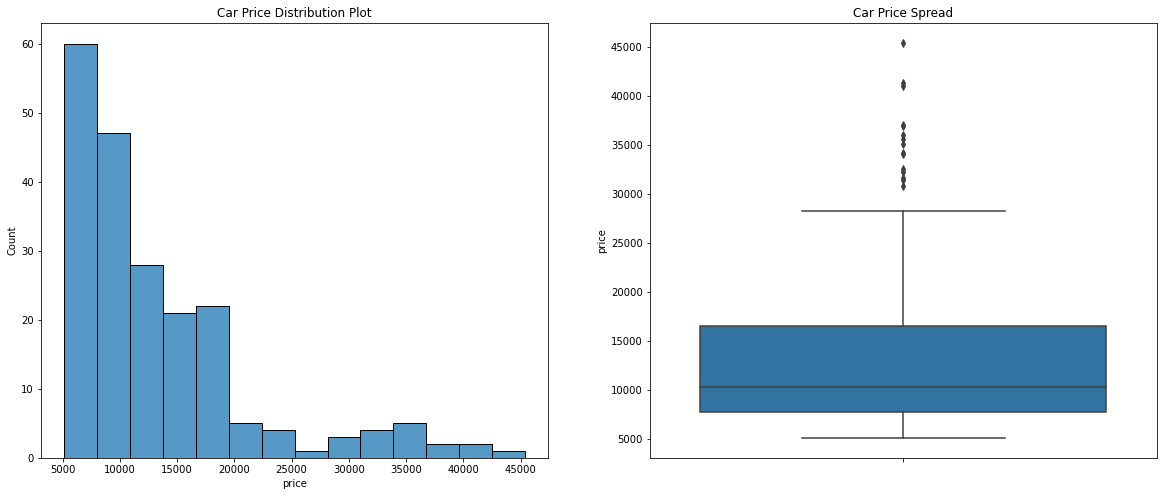

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [12]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


### Inferenza :

1. Il grafico mostra che la maggior parte dei prezzi nel set di dati è bassa (inferiore a 15.000).
2. Esiste una differenza significativa tra la `media` e la `mediana` della distribuzione dei prezzi.
3. I dati sono molto distanti dalla `media`, il che indica un'elevata variazione dei prezzi delle auto (l'85% dei prezzi è inferiore a 18.500, mentre il restante 15% è compreso tra 18.500 e 45.400). 

## Step 3.1 : Visualizzazione delle feature categoriche

    - CompanyName
    - Symboling
    - fueltype
    - enginetype
    - carbody
    - doornumber
    - enginelocation
    - fuelsystem
    - cylindernumber
    - aspiration
    - drivewheel

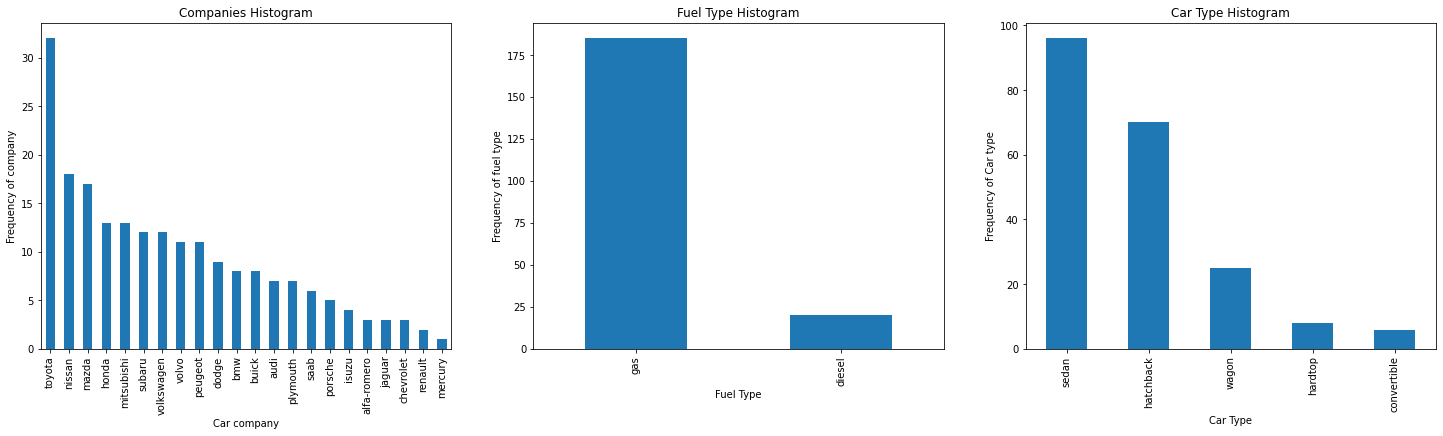

In [13]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind ='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

### Inferenza :
1. `Toyota` sembra essere l'azienda favorita.
2. Il numero delle macchine alimentate a `gas` sono di numero maggiore rispetto a quelle alimentate a `diesel`.
3. `sedan` è il tipo di macchina preferito.

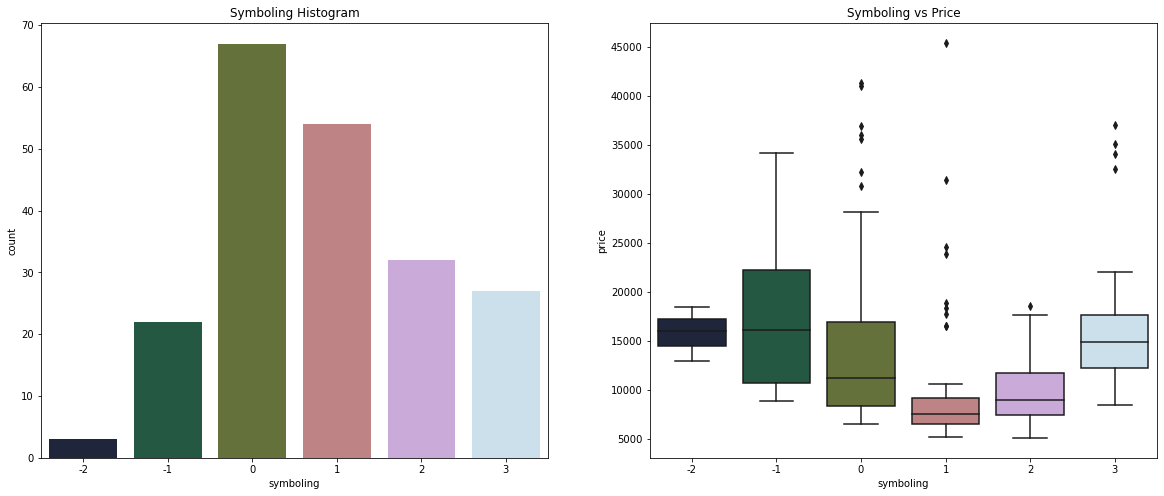

In [14]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(x=cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

### Inferenza :

1. Sembra che i simboli con i valori `0` e `1` abbiano un numero elevato di righe (ovvero sono i più venduti).
2. Le auto con il simbolo `-1` sembrano avere un prezzo elevato, ma sembra che il simbolo con il valore `3` abbia una fascia di prezzo simile al valore `-2`. 
3. C'è un calo di prezzo al simbolo `1`. 

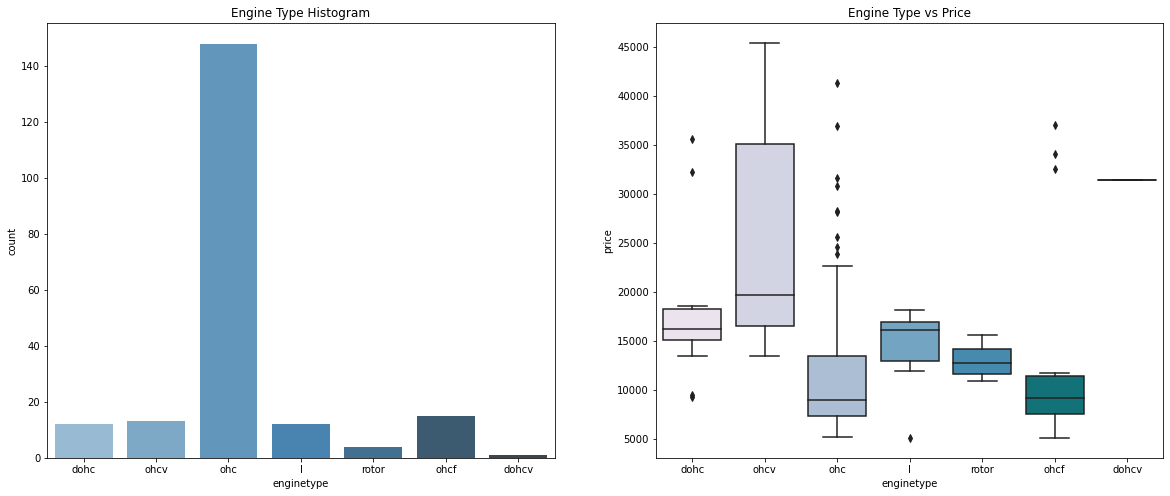

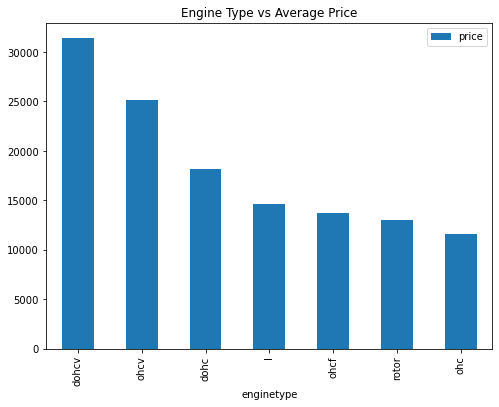

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(x=cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()


### Inferenza :
1. `ohc` sembra essere il tipo di motore preferito.
2. `ohcv` ha la fascia di prezzo più elevata (mentre `dohcv` ha solo una riga); `ohc` e `ohcf` hanno la fascia di prezzo più bassa.

<Figure size 1800x432 with 0 Axes>

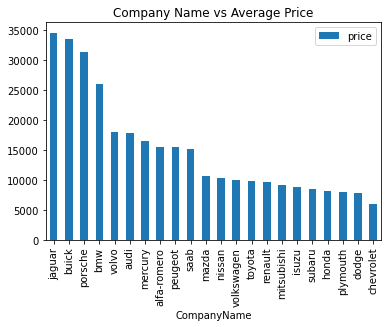

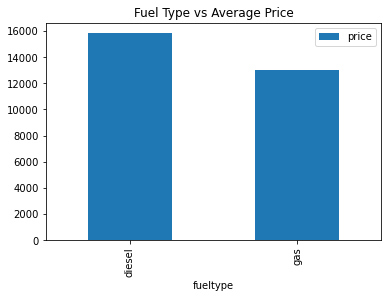

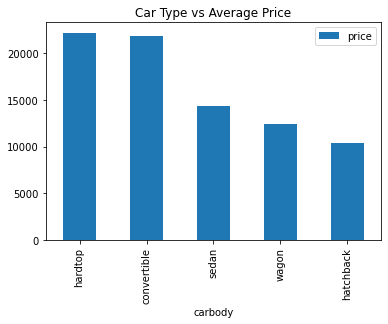

In [16]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

### Inferenza :

1. `Jaguar` e `Buick` sembrano avere la media di prezzo più alta.
2. `diesel` ha la media prezzo più alta rispetto al `gas`.
3. `hardtop` e `convertible` hanno la media di prezzo più alta.

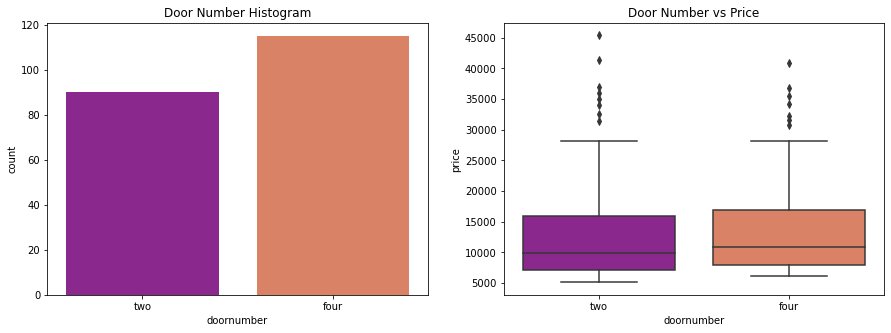

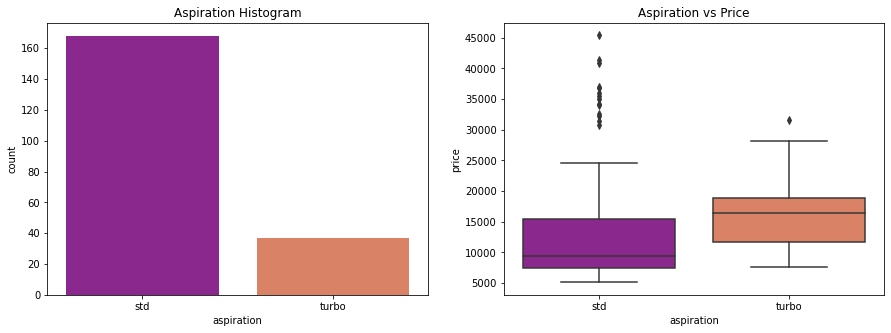

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(x=cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(x=cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()


### Inferenza :

1. `doornumber` non influenza molto il prezzo: non c'è una significativa differenza di prezzo tra le due categorie.
2. Sembra che l'aspirazione con `turbo` abbia la fascia di prezzo più elevata rispetto all'aspirazione `std` (sebbene sembra che l'aspirazione standard sia la più venduta).

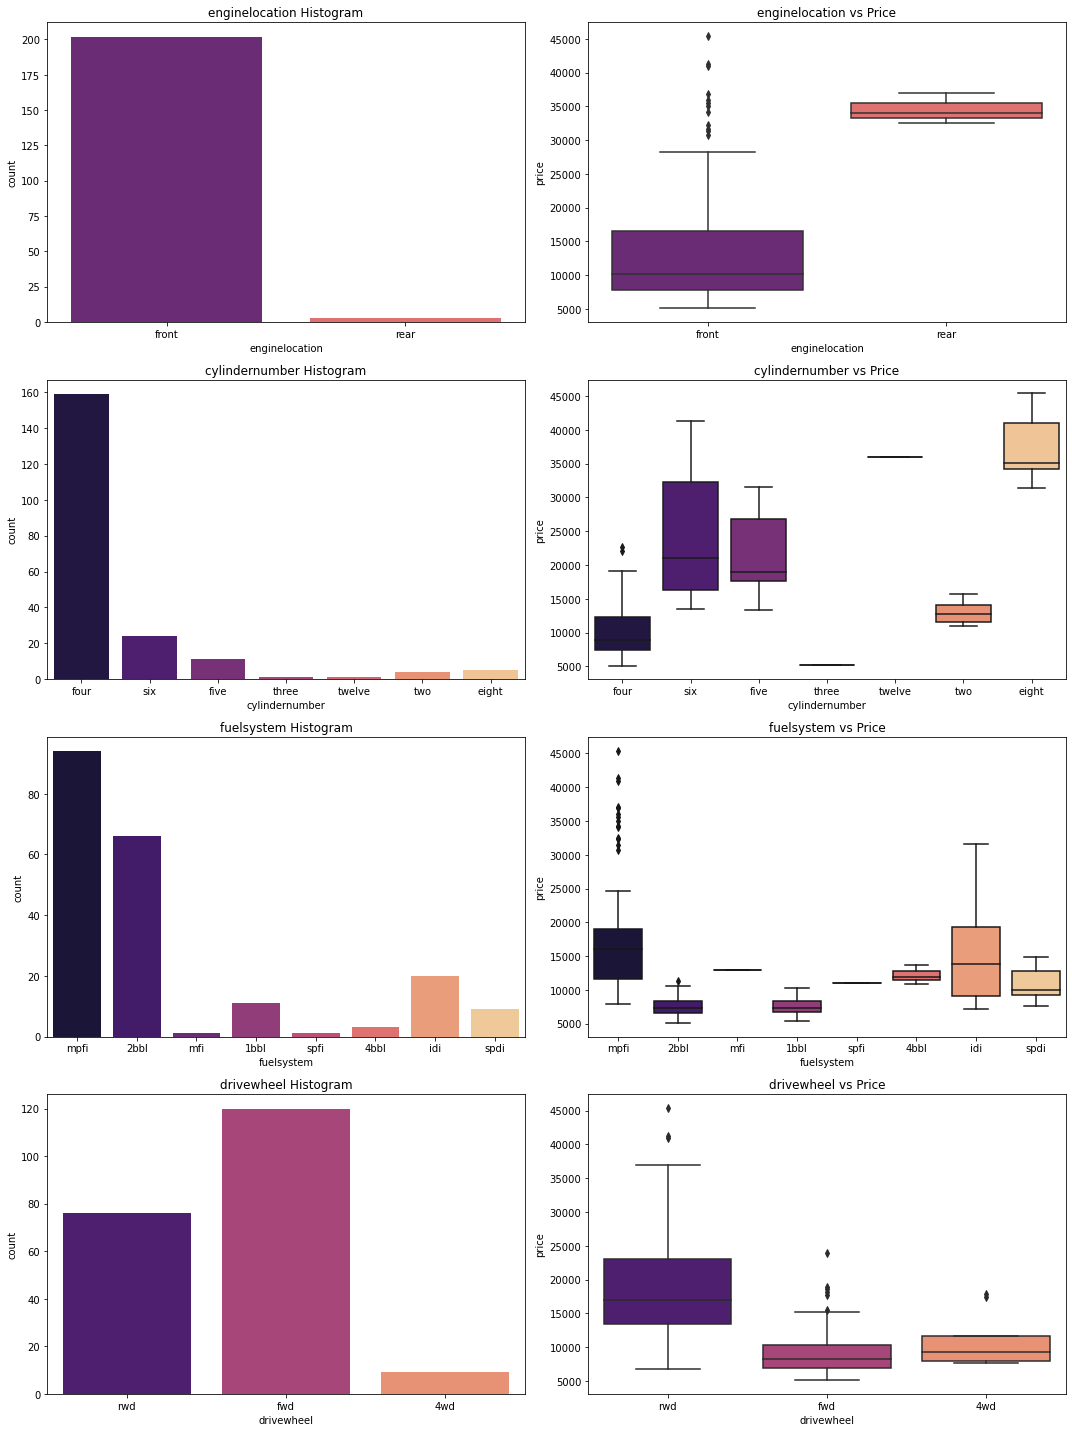

In [18]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(x=cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

### Inferenza :

1. Ci sono troppi pochi dati di `enginelocation` per poter ottenere un'inferenza.
2. I più comuni numeri di cilindri sono `four`, `six` e `five`. Anche se `eight` ha la fascia di prezzo più elevata.
3. `mpfi` e `2bbl` sono i tipi più comuni del sistema di alimentazione. `mpfi` e `idi` hanno la fascia di prezzo più elevata, ma ci sono troppi pochi dati delle altre categorie per derivare qualsiasi significante inferenza
4. Un'importante differenza si ha nella feature `drivewheel`. Le macchine `rwd` sembrano essere quelle con la fascia di prezzo più alta.

## Step 3.2 : Visualizzazione delle feature numeriche

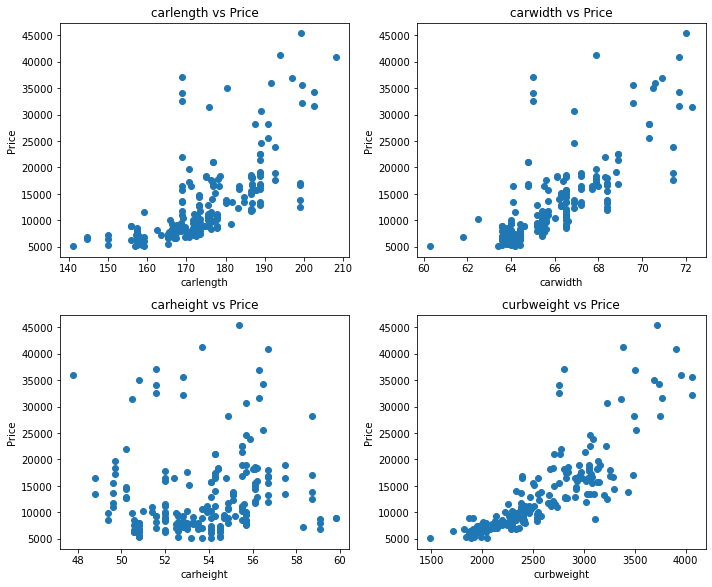

In [19]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))
        
scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

### Inferenza :

1. `carwidth`, `carlength` e `curbweight` sembrano avere una significativa correlazione positiva con `price`. 
2. `carheight` non mostra nessuna significativa correlazione con `price`.

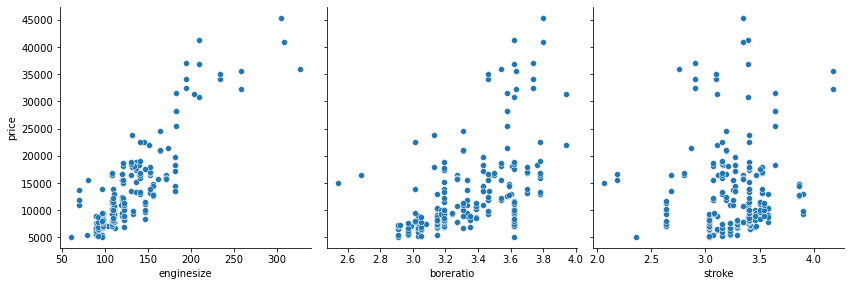

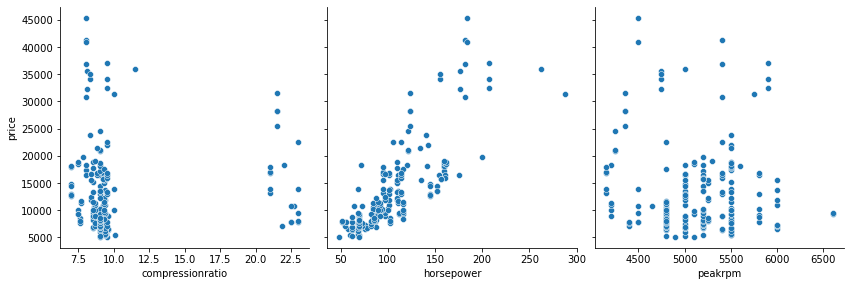

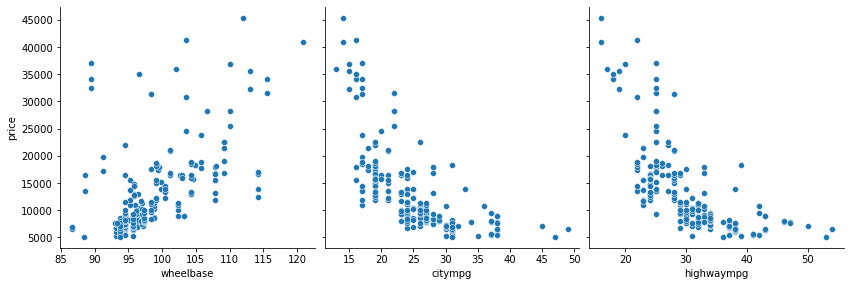

In [20]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

### Inferenza :

1. `enginesize`, `boreratio`, `horsepower`e `wheelbase` sembrano avere una significativa correlazione positiva con `price`. 
2. `citympg` e `highwaympg` sembrano avere una significativa correlazione negativa con `price`.

# Step 4 : Derivazione di nuove features

- Si stima che ogni macchina consumi il 55% del proprio carburante in città e la restante parte, cioè il 45%, fuori città.

In [21]:
#Fuel economy
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [33]:
#Binning the Car Companies based on avg prices of each Company.
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845,25.25,Medium
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045,21.70,Medium
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485,20.25,Medium
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470,26.45,Medium


# Step 5 : Analisi

In [ ]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

### Inference :

1. `fueleconomy` ha un'importante correlazione negativa con `price`.

In [ ]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

### Inferenza :

1. Le auto di alta gamma preferiscono la ruota motrice `rwd` con sistema di alimentazione `idi` o `mpfi`.

### Lista delle variabili significative dopo l'analisi effettuata:

    - Car Range 
    - Engine Type 
    - Fuel type 
    - Car Body 
    - Aspiration 
    - Cylinder Number 
    - Drivewheel 
    - Curbweight 
    - Car Length
    - Car width
    - Engine Size 
    - Boreratio 
    - Horse Power 
    - Wheel base 
    - Fuel Economy 

In [ ]:
cars = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars.head()

# Step 6 : Variabili fittizie

- Si trasformano le variabili categoriche in variabili fittizie

In [ ]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars = dummies('fueltype',cars)
cars = dummies('aspiration',cars)
cars = dummies('carbody',cars)
cars = dummies('drivewheel',cars)
cars = dummies('enginetype',cars)
cars = dummies('cylindernumber',cars)
cars = dummies('carsrange',cars)

In [ ]:
cars.head()

In [ ]:
cars.shape

In [ ]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(cars.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Inferenza
1. Le variabili più correlate al prezzo sono: `curbweight`, `enginesize`, `horsepower`, `carwidth` e `Highend`.

In [ ]:
vars = ["curbweight", "enginesize", "horsepower", "carwidth", "Highend", "price"]

In [ ]:
sns.pairplot(cars[vars])
plt.show()

# Step 7 : Train-Test Split e standardizzazione

In [ ]:
from sklearn.model_selection import train_test_split

X = cars[vars].drop("price", axis = 1).values
Y = cars["price"].values

np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

## Step 7.1: standardizzazione
- Si standardizzano le variabili numeriche

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Step 8 : Ricerca del modello di predizione più adatto

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures

#Test the model in input
def try_model(model,parameters, X_train, Y_train, X_test, Y_test):
    mod = GridSearchCV(model, parameters, cv=None)
    mod.fit(X_train, Y_train)
    Y_pred_test = mod.predict(X_test)
    Y_pred_train = mod.predict(X_train)
    
    
    print("\nTrain Metrics: ")
    print("Mean squared log error train: ", mean_squared_log_error(Y_train, Y_pred_train))
    print("R2 score pred train: ", r2_score(Y_train, Y_pred_train))
    print("\nTest Metrics: ")
    print("Mean squared log error test: ", mean_squared_log_error(Y_test, Y_pred_test))
    print("R2 score pred test: ", r2_score(Y_test, Y_pred_test))
    
    # EVALUATION OF THE MODEL
    # Plotting y_test and y_pred to understand the spread.
    fig = plt.figure()
    plt.scatter(Y_test, Y_pred_test)    
    fig.suptitle('Y test vs Y predicted', fontsize=20)  # Plot heading
    plt.xlabel('Y test', fontsize=18)  # X-label
    plt.ylabel('Y predicted', fontsize=16)
    plt.show()

## REGRESSIONE LINEARE

In [ ]:
parameters = {'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]}
try_model(LinearRegression(), parameters, X_train, Y_train, X_test, Y_test)

## MODELLO LASSO

In [ ]:
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 10.], 'fit_intercept': [True, False], 'normalize': [True, False],
              'copy_X': [True, False],
              'precompute': [True, False], 'max_iter': [i for i in range(1000, 10000, 500)],
              'warm_start': [True, False],
              'positive': [True, False], 'selection': ['cyclic', 'random']}
try_model(Lasso(), parameters, X_train, Y_train, X_test, Y_test)

## MODELLO RIDGE

In [ ]:
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 10.], 'fit_intercept': [True, False], 'normalize': [True, False],
              'copy_X': [True, False],
              'max_iter': [i for i in range(1000, 10000, 500)],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
try_model(Ridge(), parameters, X_train, Y_train, X_test, Y_test)

## MODELLO ELASTICNET

In [ ]:
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 10.], 'l1_ratio': [0.2, 0.4, 0.6, 0.8, 1.0],
              'fit_intercept': [True, False], 'normalize': [True, False],
              'copy_X': [True, False],
              'precompute': [True, False],
              'warm_start': [True, False],
              'max_iter': [i for i in range(1000, 10000, 500)],
              'selection': ['cyclic', 'random']}
try_model(ElasticNet(), parameters, X_train, Y_train, X_test, Y_test)

## REGRESSIONE POLINOMIALE DI GRADO 2

In [ ]:
parameters = {'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]}
polyfeats = PolynomialFeatures(degree=2)
X_train_poly = polyfeats.fit_transform(X_train)
X_test_poly = polyfeats.transform(X_test)
try_model(LinearRegression(), parameters, X_train_poly, Y_train, X_test_poly, Y_test)

### Inferenza: 
1. Si evince che il modello più adatto è la regressione polinomiale di grado 2.
2. Non è presente overfitting.
2. R-squared della regressione polinomiale è di 0.9409 e il Mean Squared Log Error è di 0.017.

# KNOWLEDGE BASE

- Si è implementata una knowledge base nella quale sono stati inseriti:
  - tutti i nomi delle aziende automobilistiche;
  - i sistemi di alimentazione;
  - le relazione tra modelli di auto e tipo di alimentazione;
  - tutti i modelli di ogni azienda automibilistica;
  - la tipologia di macchina per ogni modello esistente nel dataset.

In [ ]:
from pyswip import Prolog

prolog = Prolog()
prolog.consult("data/knowledge_base.pl")